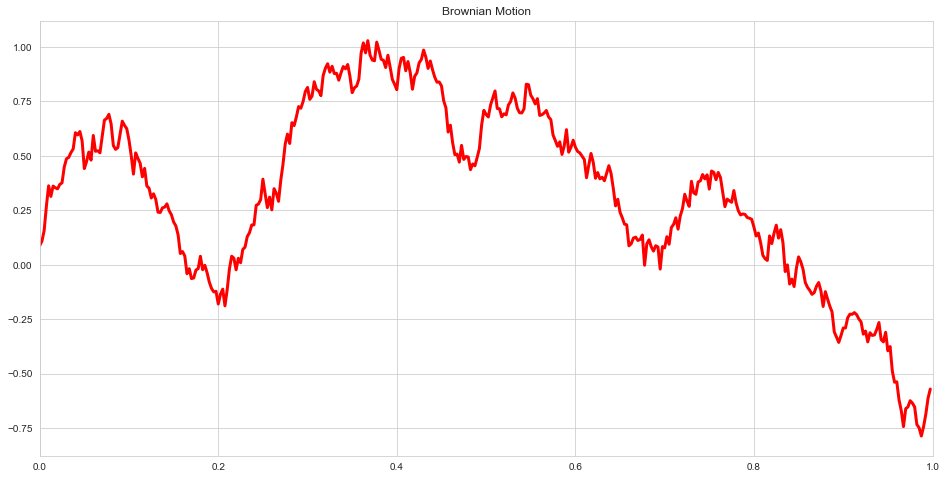

In [2]:
# Mô phỏng chuyển động Brown
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0) #để cố định tập random
N=400
T=1
dt = T/N

t = np.arange(0, T, dt)
dW = np.sqrt(dt)*np.random.randn(N) #randn: tạo N số random có phân phối chuẩn tắc
W = np.cumsum(dW) #W là tổng tích lũy của các dW

fig = plt.figure(figsize=(16,8))
plt.title("Brownian Motion")
plt.plot(t,W,'-r')
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

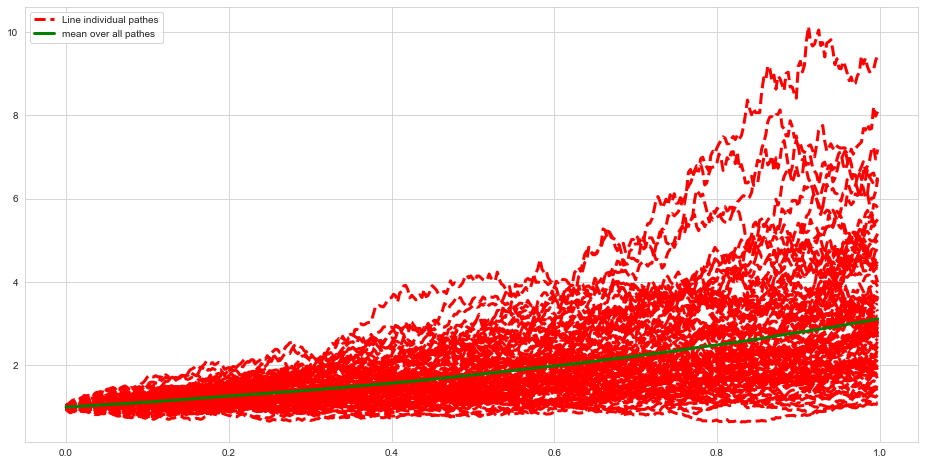

In [3]:
# Mô phỏng hàm u (chỉ vẽ trên đồ thị 90 quỹ đạo) và tính trung bình của 2000 mẫu u
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

np.random.seed(0)

N=400
M=2000
T=1

dt = T/N
t = np.arange(0, T, dt)
dW = np.sqrt(dt)*randn(N,M) # tạo mảng chứa các giá trị ngẫu nhiên có phân phối chuẩn tắc với N dòng và M cột
W = np.cumsum(dW,axis=0)  #Tổng tích lũy của dW theo trục 0 
t_  = np.transpose(numpy.matlib.repmat(t, M, 1))  # np.transpose(): chuyển vị
                                                # numpy.matlib.repmat(a,M,N): lặp lại mảng 0-chiều để tạo ra ma trận MxN 
u=np.exp(t_+ 0.5*W)
u_mean = np.mean(u, axis=1) #tính giá trị trung bình của u trên trục 1

fig = plt.figure(figsize=(16,8))
h1 = plt.plot(t, u[:,np.arange(10,100)],'r--', label="Line individual pathes")[1]
h2, = plt.plot(t, u_mean, 'g-', label="mean over all pathes")
plt.legend(handles=[h1,h2])

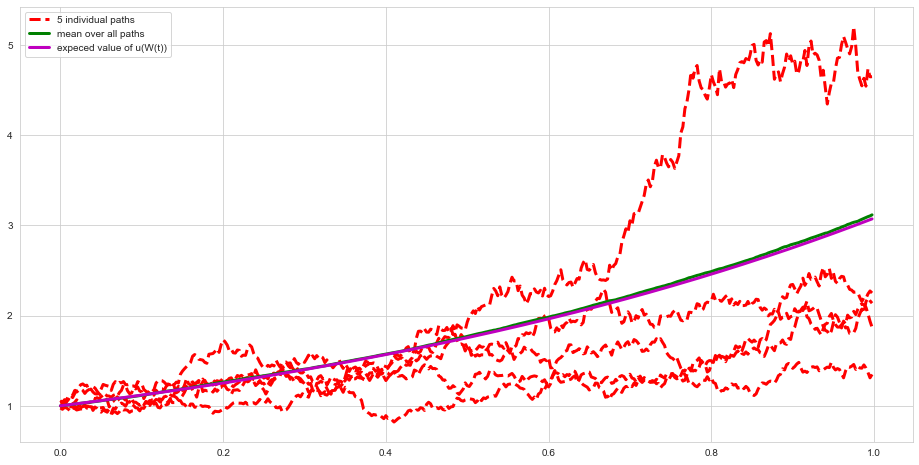

In [4]:
# Mô phỏng hàm u (chỉ vẽ trên đồ thị 5 quỹ đạo) và tính trung bình 2000 mẫu u 
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
np.random.seed(0)

N=400
M=2000
T=1

dt = T/N
t = np.arange(0, T, dt)
dW = np.sqrt(dt)*randn(N,M) # Tạo mảng chứa các giá trị ngẫu nhiên có phân phối chuẩn tắc với N dòng và M cột
W = np.cumsum(dW,axis=0)  # Tổng tích lũy của dW theo trục 0 
t_  = np.transpose(numpy.matlib.repmat(t, M, 1))  # np.transpose(): chuyển vị
                                         # numpy.matlib.repmat(a,M,N): lặp lại mảng 0-chiều để tạo ra ma trận MxN 
u=np.exp(t_+ 0.5*W)
u_mean = np.mean(u, axis=1) # Giá trị trung bình của u trên trục 1
expected_u= np.exp((9/8)*t) # Giá trị kỳ vọng của u

fig = plt.figure(figsize=(16,8))
h1 = plt.plot(t, u[:,np.arange(1,6)],'r--', label="5 individual paths")[1] #Chỉ vẽ 5 paths
h2, = plt.plot(t, u_mean, 'g-', label="mean over all paths")
h3, = plt.plot(t, expected_u, 'm-', label="expeced value of u(W(t))")
plt.legend(handles=[h1,h2,h3])

In [5]:
# Tính chênh lệch lớn nhất giữa trung bình 2000 mẫu và giá trị kỳ vọng của u(W(t)) trên toàn bộ tj
expected_u= np.exp((9/8)*t)
discrepancy = np.abs(expected_u - u_mean)
discrepancy_max = np.ndarray.max(discrepancy)

print('chênh lệch lớn nhất giữa trung bình mẫu và giá trị kỳ vọng của u(W(t)) là:', discrepancy_max)
for i in range(0, len(discrepancy)):
    if discrepancy[i] == discrepancy_max:
        print('tại tj =', t[i] , 'với j =', i)

chênh lệch lớn nhất giữa trung bình mẫu và giá trị kỳ vọng của u(W(t)) là: 0.045141366187650966
tại tj = 0.9975 với j = 399


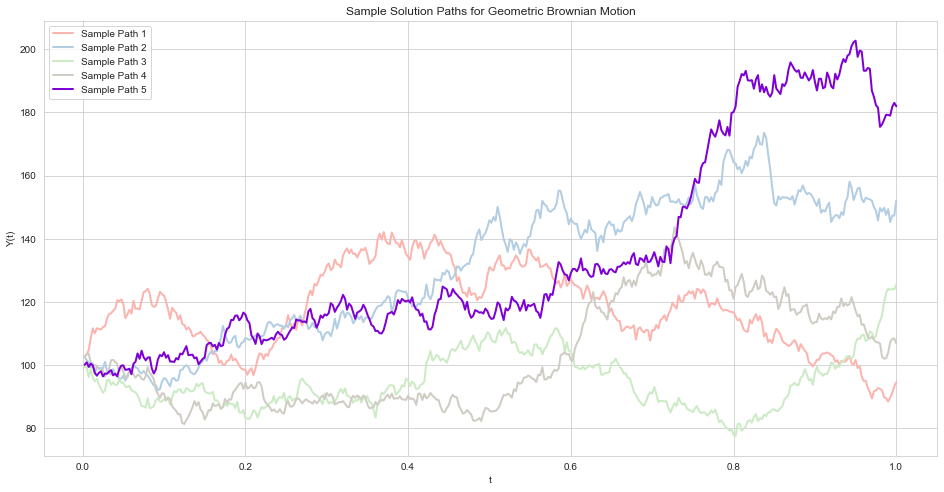

In [6]:
# Vẽ đồ thị của u với 5 mẫu khác nhau 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4", "#7F00D4"]

# SDE model parameters
mu = 0.16
sigma = 0.30
X0 = 100

# Simulation parameters
T = 1
N = 400
dt = T / N
t = np.arange(dt, 1 + dt, dt)  # Start at dt because Y = X0 at t = 0

# Initiate plot object
plt.title('Sample Solution Paths for Geometric Brownian Motion')
plt.ylabel('Y(t)'); plt.xlabel('t')

# Create and plot sample paths
for i in range(len(pal)):
    
    # Tạo chuyển động Brown
    np.random.seed(i)
    dW = np.sqrt(dt) * np.random.randn(N)
    W  = np.cumsum(dW)
    
    # Nghiệm chính xác 
    Y = X0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    
    # Add line to plot
    plt.plot(t, Y, label = "Sample Path " + str(i+1), color=pal[i])

# Add legend
plt.legend(loc = 2)

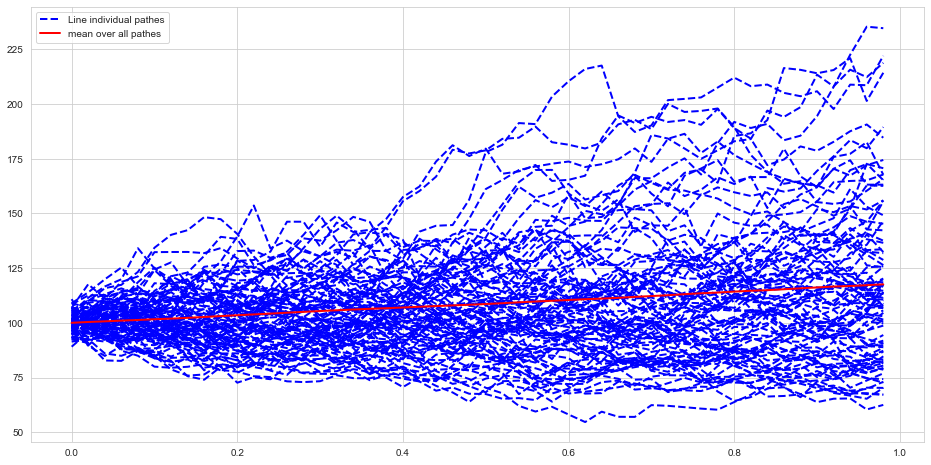

In [7]:
# Mô phỏng giá cổ phiếu bằng chuyển động Brown hình học (phương trình Black-Scholes)
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from numpy.random import randn
import numpy.matlib
import matplotlib.pyplot as plt

np.random.seed(0)

S0 = 100
mu = 0.16
sigma = 0.32

N=50
M=10000
T=1
dt = T/N

t = np.arange(0,T , dt)
dW = np.sqrt(dt)*randn(N,M)
W = np.cumsum(dW,axis=0)

t_  = np.transpose(numpy.matlib.repmat(t, M, 1))

u = S0 * np.exp(((mu - 0.5*sigma**2)*t_)+(sigma*W))
u_mean = np.mean(u, axis=1)
fig = plt.figure(figsize=(16,8))

h1 = plt.plot(t, u[:,np.arange(10,100)],'b--', label="Line individual pathes")[1]
h2, = plt.plot(t, u_mean, 'r-', label="mean over all pathes")
plt.legend(handles=[h1,h2])

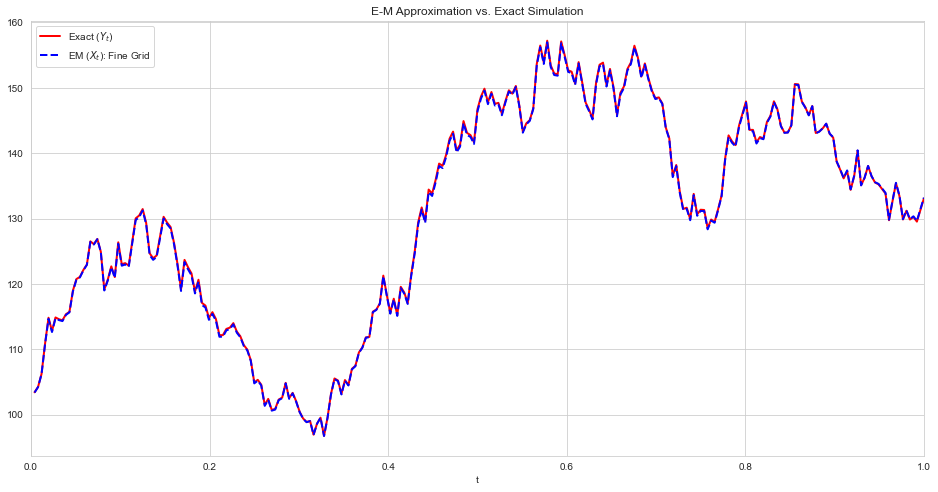

In [12]:
# Mô phỏng nghiệm xấp xỉ EM và nghiệm chính xác của phương trình Black-Scholes 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['lines.linewidth'] = 2

# Tạo chuyển động Brown
np.random.seed(0)
dW = np.sqrt(dt) * np.random.randn(N)
W  = np.cumsum(dW)

T, N = 1, 2**8
dt = 1.0 / N
t = np.arange(dt, 1+dt, dt)

mu=0.16
sigma=0.3
X0=100

# Nghiệm chính xác
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * W))

# Xấp xỉ EM
X_em, X = [], X0
for j in range(N):  
    X += mu*X*dt + sigma*X*dW[j]
    X_em.append(X)
    
# Plot
axes = plt.gca()
axes.set_xlim([0,T])
plt.plot(t, Y, label="Exact ($Y_t$)", color='red')
plt.plot(t, X_em, label="EM ($X_t$): Fine Grid", color='blue', ls='--')
plt.title('E-M Approximation vs. Exact Simulation'); plt.xlabel('t'); plt.legend(loc = 2);

In [13]:
# Tính sai số điểm cuối của nghiệm chính xác và nghiệm xấp xỉ
ss = np.abs(X_em[len(X_em)-1]-Y[len(Y)-1])
print('error =', ss)

error = 0.14140508684170072


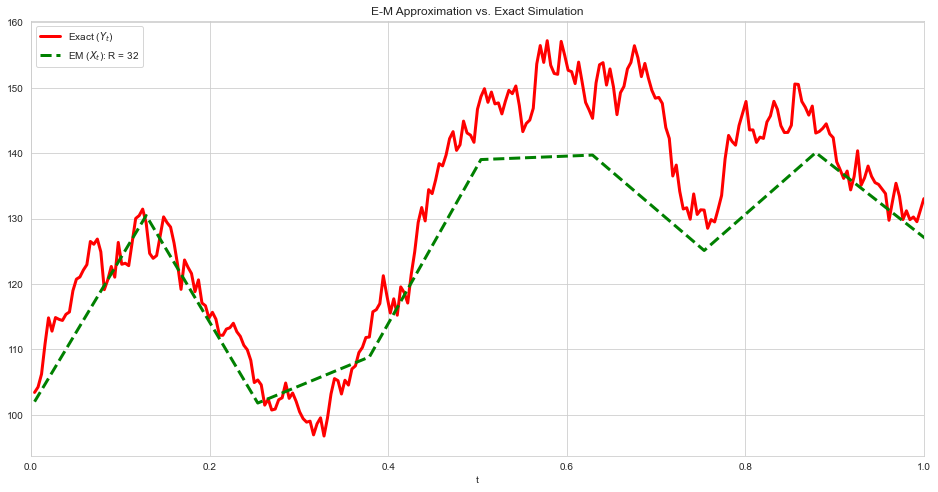

In [15]:
# Mô phỏng nghiệm xấp xỉ EM khi R = 32
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['lines.linewidth'] = 3

np.random.seed(0)
T, N = 1, 2**8
dt = 1.0 / N
t = np.arange(dt, T+dt, dt)  

mu=0.16
sigma=0.3
X0=100

R=32

Dt=R*dt

# Tạo chuyển động Brown
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)

# Nghiệm chính xác
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * B))

# Xấp xỉ EM
X_em_big, X= [], X0
t_em = np.arange(dt,T+ Dt,Dt)
for j in range(int(N/R)+1):
    X += mu*X*Dt + sigma*X*sum(dB[R*(j-1):R*j])
    X_em_big.append(X)    
    
# Plot
axes = plt.gca()
axes.set_xlim([0,T])
plt.plot(t, Y, label="Exact ($Y_t$)", color='red')
plt.plot(t_em, X_em_big, label="EM ($X_t$): R = 32", color='green', ls='--')
plt.title('E-M Approximation vs. Exact Simulation'); plt.xlabel('t'); plt.legend(loc = 2)

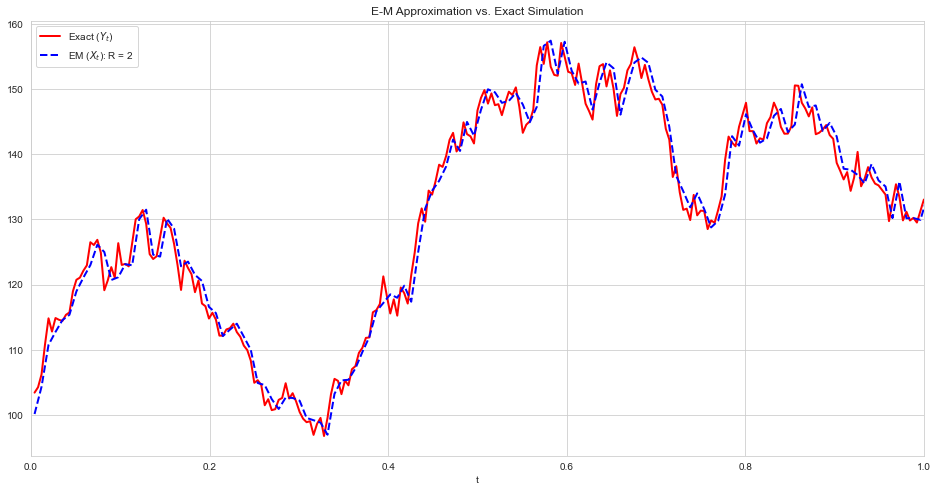

In [17]:
# Mô phỏng nghiệm xấp xỉ EM khi R = 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['lines.linewidth'] = 2


np.random.seed(0)
T, N = 1, 2**8
dt = 1.0 / N
t = np.arange(dt, T+dt, dt)  

mu=0.16
sigma=0.3
X0=100

R=2

Dt=R*dt

# Create Brownian Motion
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)

# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * B))

# EM Approximation - big dt
X_em_big, X= [], X0
t_em = np.arange(dt,T+ Dt,Dt)
for j in range(int(N/R)+1):
    X += mu*X*Dt + sigma*X*sum(dB[R*(j-1):R*j])
    X_em_big.append(X)    
    
# Plot
axes = plt.gca()
axes.set_xlim([0,T])
plt.plot(t, Y, label="Exact ($Y_t$)", color='red')
plt.plot(t_em, X_em_big, label="EM ($X_t$): R = 2", color='blue', ls='--')
plt.title('E-M Approximation vs. Exact Simulation'); plt.xlabel('t'); plt.legend(loc = 2)

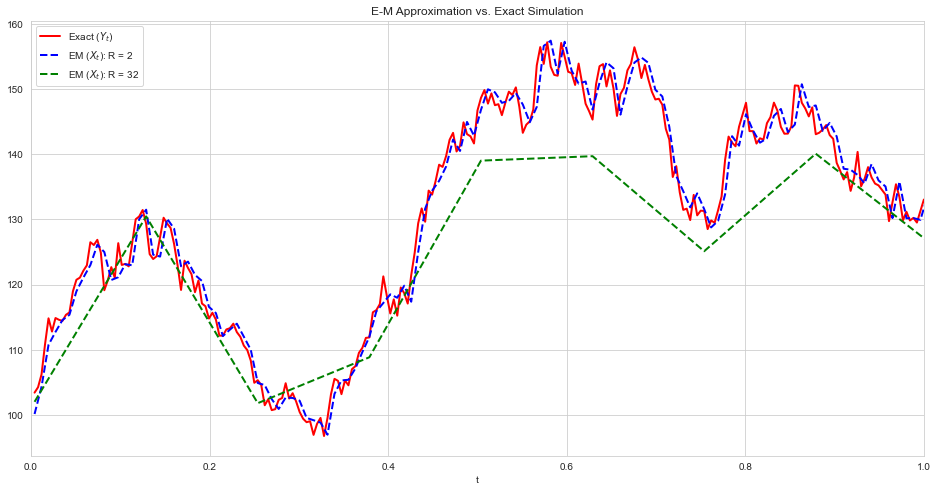

In [20]:
# Mô phỏng nghiệm xấp xỉ EM với R = 32 và R = 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['lines.linewidth'] = 2

np.random.seed(0)
T, N = 1, 2**8
dt = 1.0 / N
t = np.arange(dt, T+dt, dt)  # Start at dt because Y = X0 at t = 0

mu=0.16
sigma=0.3
X0=100

Rs=2
Rb=32

Dts=Rs*dt
Dtb=Rb*dt

# Create Brownian Motion
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)

# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * B))

# EM Approximation - small dt
X_em_small, X= [], 100
t_em_small = np.arange(dt,T+ Dts,Dts)
for j in range(int(N/Rs)+1):
    X += mu*X*Dts + sigma*X*sum(dB[Rs*(j-1):Rs*j])
    X_em_small.append(X) 
    
# EM Approximation - big dt
X_em_big, X= [], 100
t_em_big = np.arange(dt,T+ Dtb,Dtb)
for j in range(int(N/Rb)+1):
    X += mu*X*Dtb + sigma*X*sum(dB[Rb*(j-1):Rb*j])
    X_em_big.append(X) 
    
# Plot
axes = plt.gca()
axes.set_xlim([0,T])
plt.plot(t, Y, label="Exact ($Y_t$)", color='red')
plt.plot(t_em_small, X_em_small, label="EM ($X_t$): R = 2", color='blue', ls='--')
plt.plot(t_em_big, X_em_big, label="EM ($X_t$): R = 32", color='green', ls='--')
plt.title('E-M Approximation vs. Exact Simulation'); plt.xlabel('t'); plt.legend(loc = 2)

In [21]:
ssR2 = np.abs(X_em_small[len(X_em_small)-1]-Y[len(Y)-1])
ssR32 = np.abs(X_em_big[len(X_em_big)-1]-Y[len(Y)-1])

print('Sai số với R=2 là:', ssR2)
print('Sai số với R=32 là:', ssR32)

Sai số với R=2 là: 0.42322387710140674
Sai số với R=32 là: 6.339044184385841


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]

# Tạo lưới dt ban đầu và các list chứa sai số
str_err_em, weak_err_em = [], []
dt_grid = [2 ** (R-10) for R in range(7)]
mc = 10000
mu, sigma, X0 = 2, 1, 1

# Lặp các giá trị trong dt
for Dt in dt_grid:
    
    # Tạo các khoảng rời rạc
    t = np.arange(Dt, 1 + Dt, Dt)
    n = len(t)
    
    # Các vector chứa sai số và chuỗi thời gian
    err_em = np.zeros(n)
    Y_sum, Xem_sum = np.zeros(n), np.zeros(n)
    
    # Tạo nhiều mẫu
    for i in range(mc):
        
        # Tạo chuyển động Brown
        np.random.seed(i)
        dB = np.sqrt(Dt) * np.random.randn(n)
        B  = np.cumsum(dB)
        
        # Nghiệm chính xác
        Y = X0 * np.exp((mu - 0.5*sigma**2)*t + sigma * B)
        
        # Tạo quá trình ngẫu nhiên 
        Xemt, Xem = X0, []
        for j in range(n):

            # Xấp xỉ Euler-Maruyama
            Xemt += mu*Xemt* Dt + sigma * Xemt * dB[j]
            Xem.append(Xemt)
            
        # Tính sai số mạnh và thêm vào các mẫu 
        err_em  += abs(Y - Xem)
        
        # Thêm X và Y vào các mẫu trước đó
        Y_sum += Y
        Xem_sum += Xem
        
    # Tính trung bình của sai sai và tìm max -> sai số mạnh
    str_err_em.append(max(err_em / mc))
   
    # Tính sai số của trung bình và tìm max -> sai số yếu
    weak_err_em.append(max(abs(Y_sum - Xem_sum)/mc))

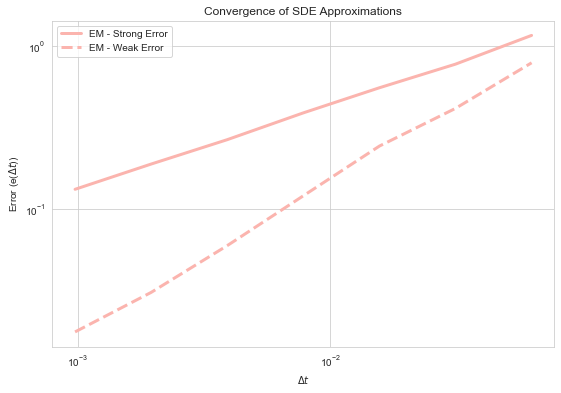

In [23]:
# Plot
plt.loglog(dt_grid, str_err_em, label="EM - Strong Error",color=pal[0])
plt.loglog(dt_grid, weak_err_em, label="EM - Weak Error",color=pal[0],ls='--')
plt.title('Convergence of SDE Approximations')
plt.xlabel('$\Delta t$'); plt.ylabel('Error (e($\Delta t$))'); plt.legend(loc=2)

In [24]:
# Nhập gói lệnh và tạo ma trận
import statsmodels.api as sm
X = sm.add_constant(np.log(dt_grid))

# Chạy OLS để xấp xỉ giá trị gamma
results = sm.OLS(np.log(weak_err_em),X).fit()
print("Weak E-M Convergence:        "+ str(results.params[1]))

results = sm.OLS(np.log(str_err_em),X).fit()
print("Strong E-M Convergence:      "+ str(results.params[1]))

Weak E-M Convergence:        0.9297415482552578
Strong E-M Convergence:      0.5203110424727103


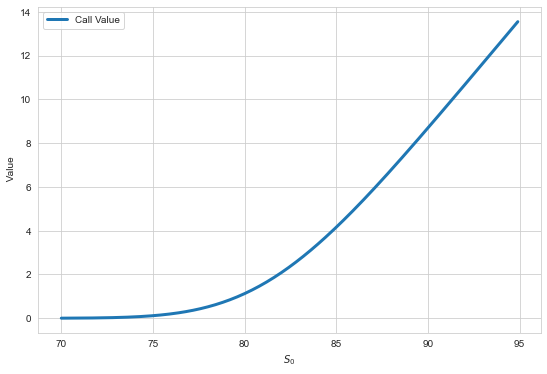

In [26]:
# Giải Black-Scholes bằng công thức
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

K = 83
r = 0.1
T = 0.2
sigma = 0.1195

S = np.arange(70,95,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()